# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524          442.246          253.291         0.820       90546   
1    75166          406.691          243.032         0.802       78789   
2    90856          442.267          266.328         0.798       93717   
3    45928          286.541          208.760         0.685       47336   
4    79408          352.191          290.828         0.564       81463   
..     ...              ...              ...           ...         ...   
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter    Class  
0     0.759   1184.040  Kecimen  
1     0.684   1121.786  Kecimen  
2     0.638   1208.575  Kecimen  
3     0.700    844.162  Kecimen  
4     0.793   1073.251  Kecimen  
..      ...        ...      ...  
895   0.669   1129.072    Besni  
896   0.636   1214.252    Besni  
897   0.741   1292.828    Besni  
898   0.659   1258.548    Besni  
899   0.632   1272.862    Besni  

[900 rows x 8 columns]

In [4]:
df.shape

(900, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [7]:
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [8]:
df.Class.value_counts(normalize = True)

Kecimen   0.500
Besni     0.500
Name: Class, dtype: float64

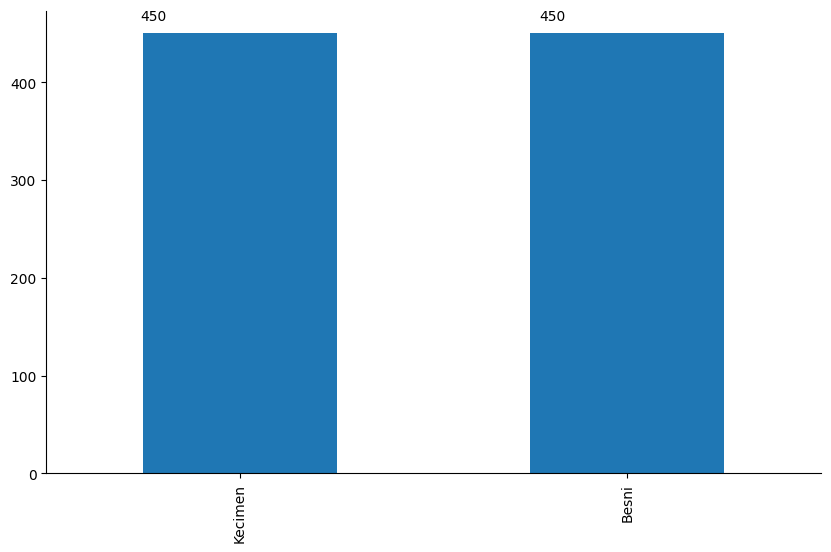

In [19]:
ax = df.Class.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))
    
# ax.bar_label(ax.containers[0]);

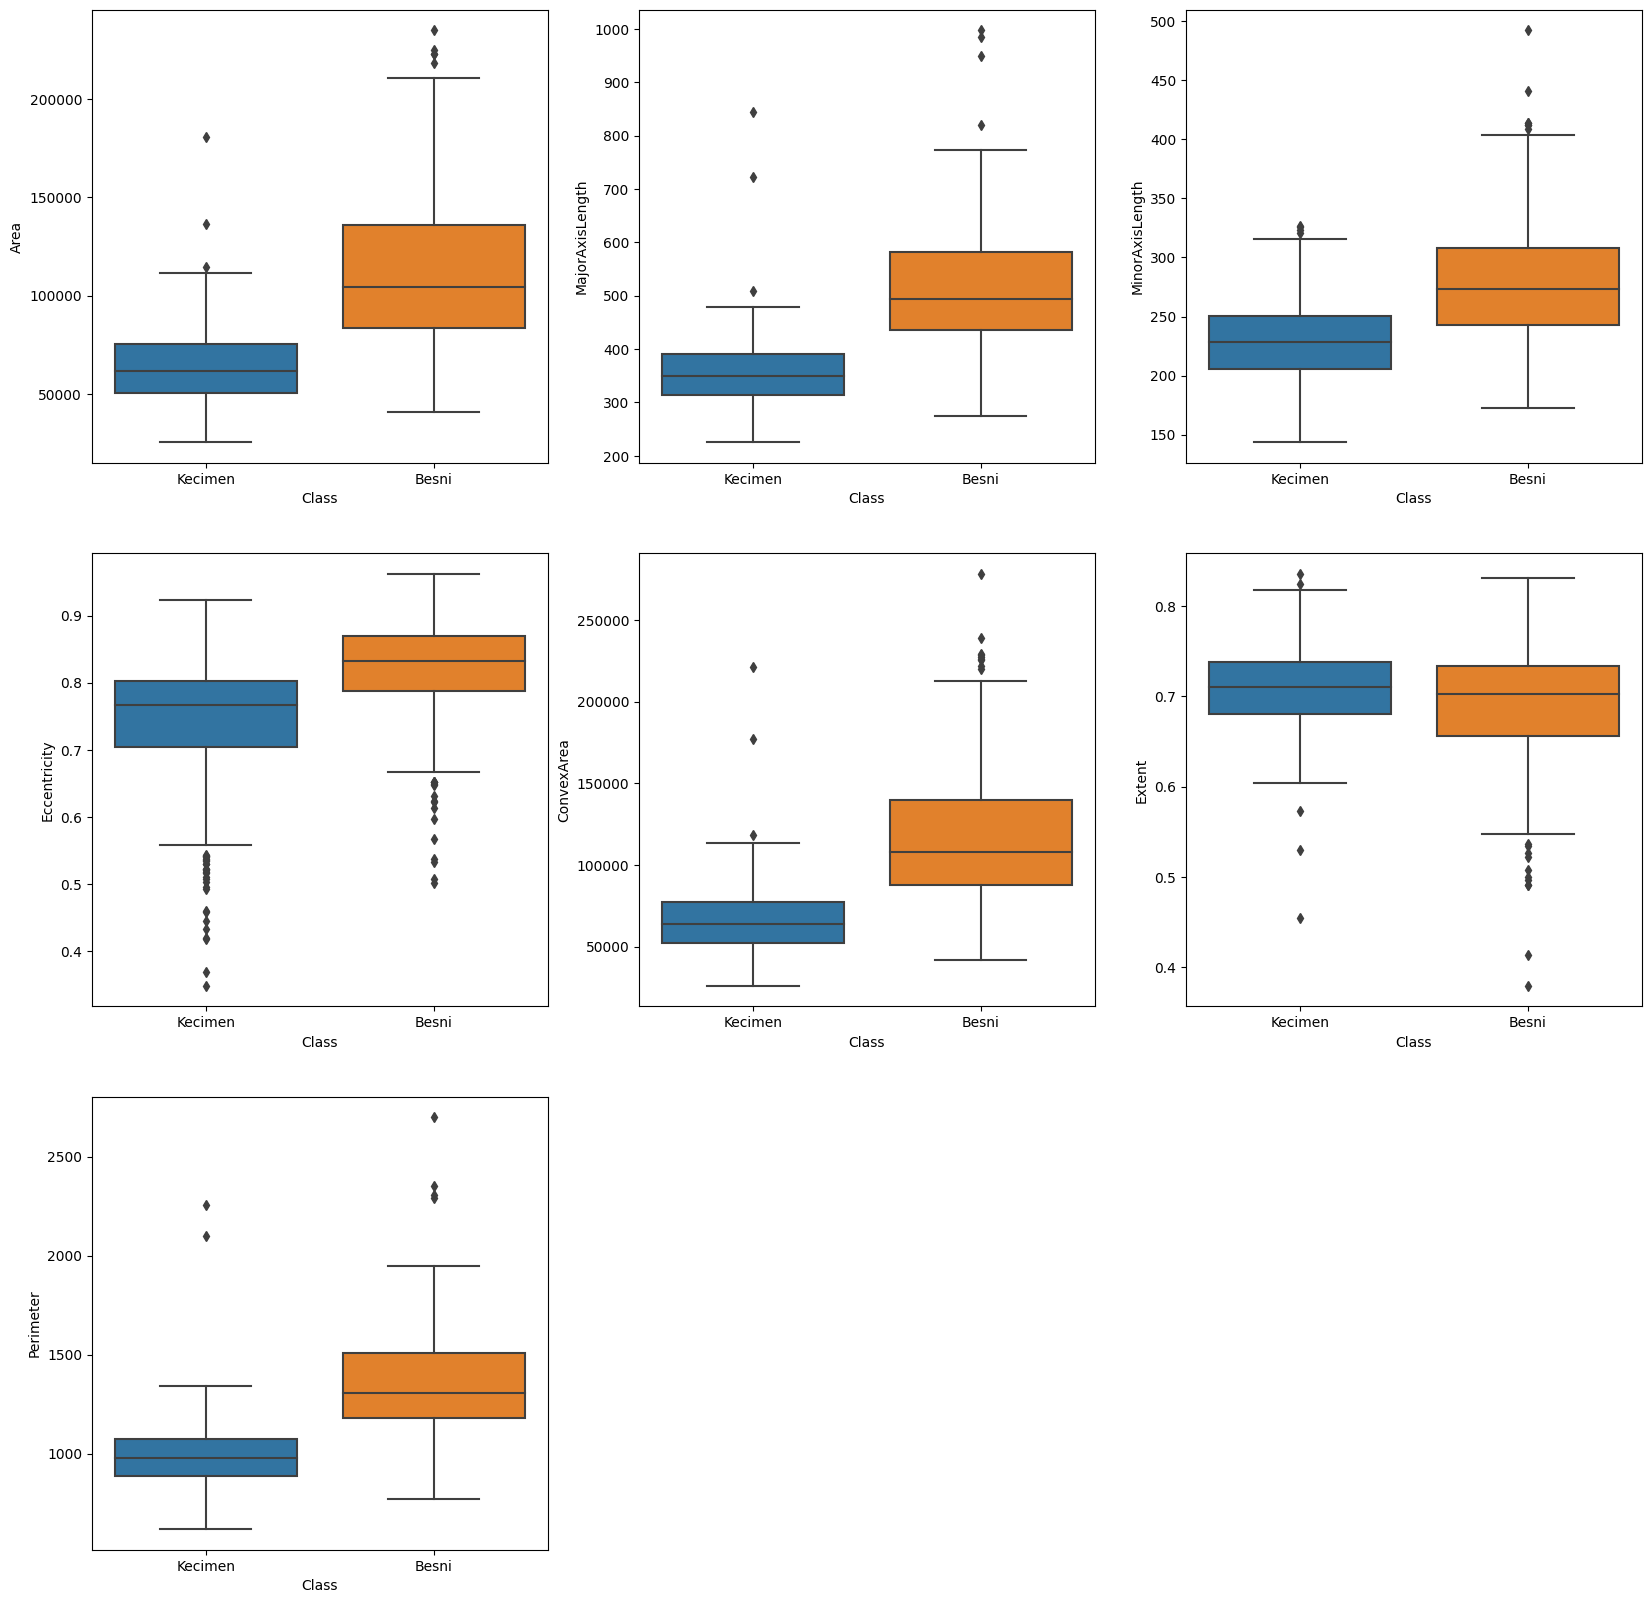

In [11]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

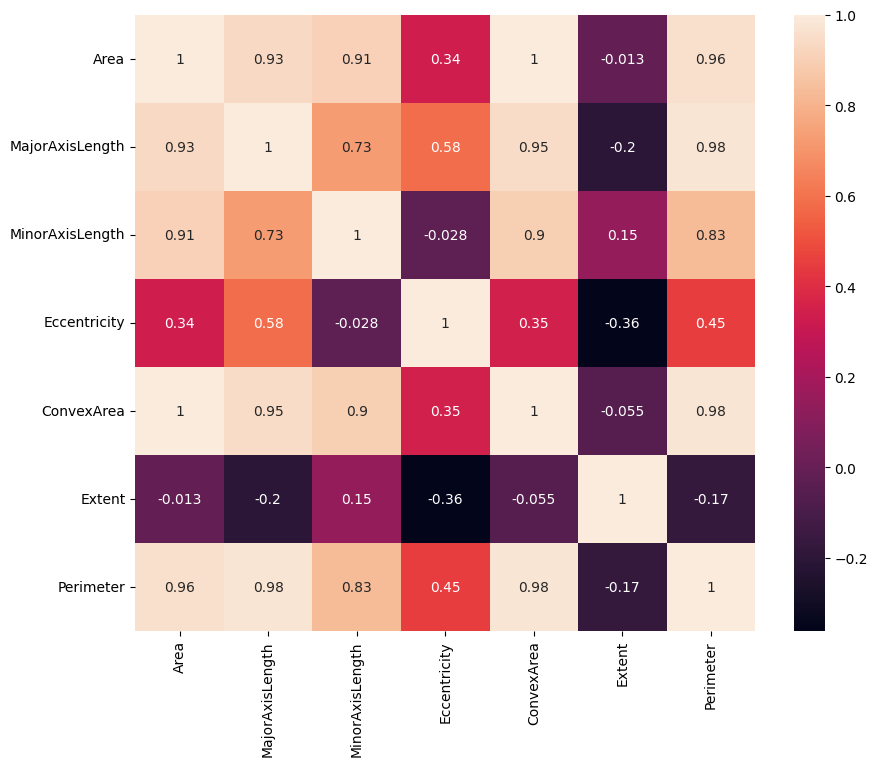

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

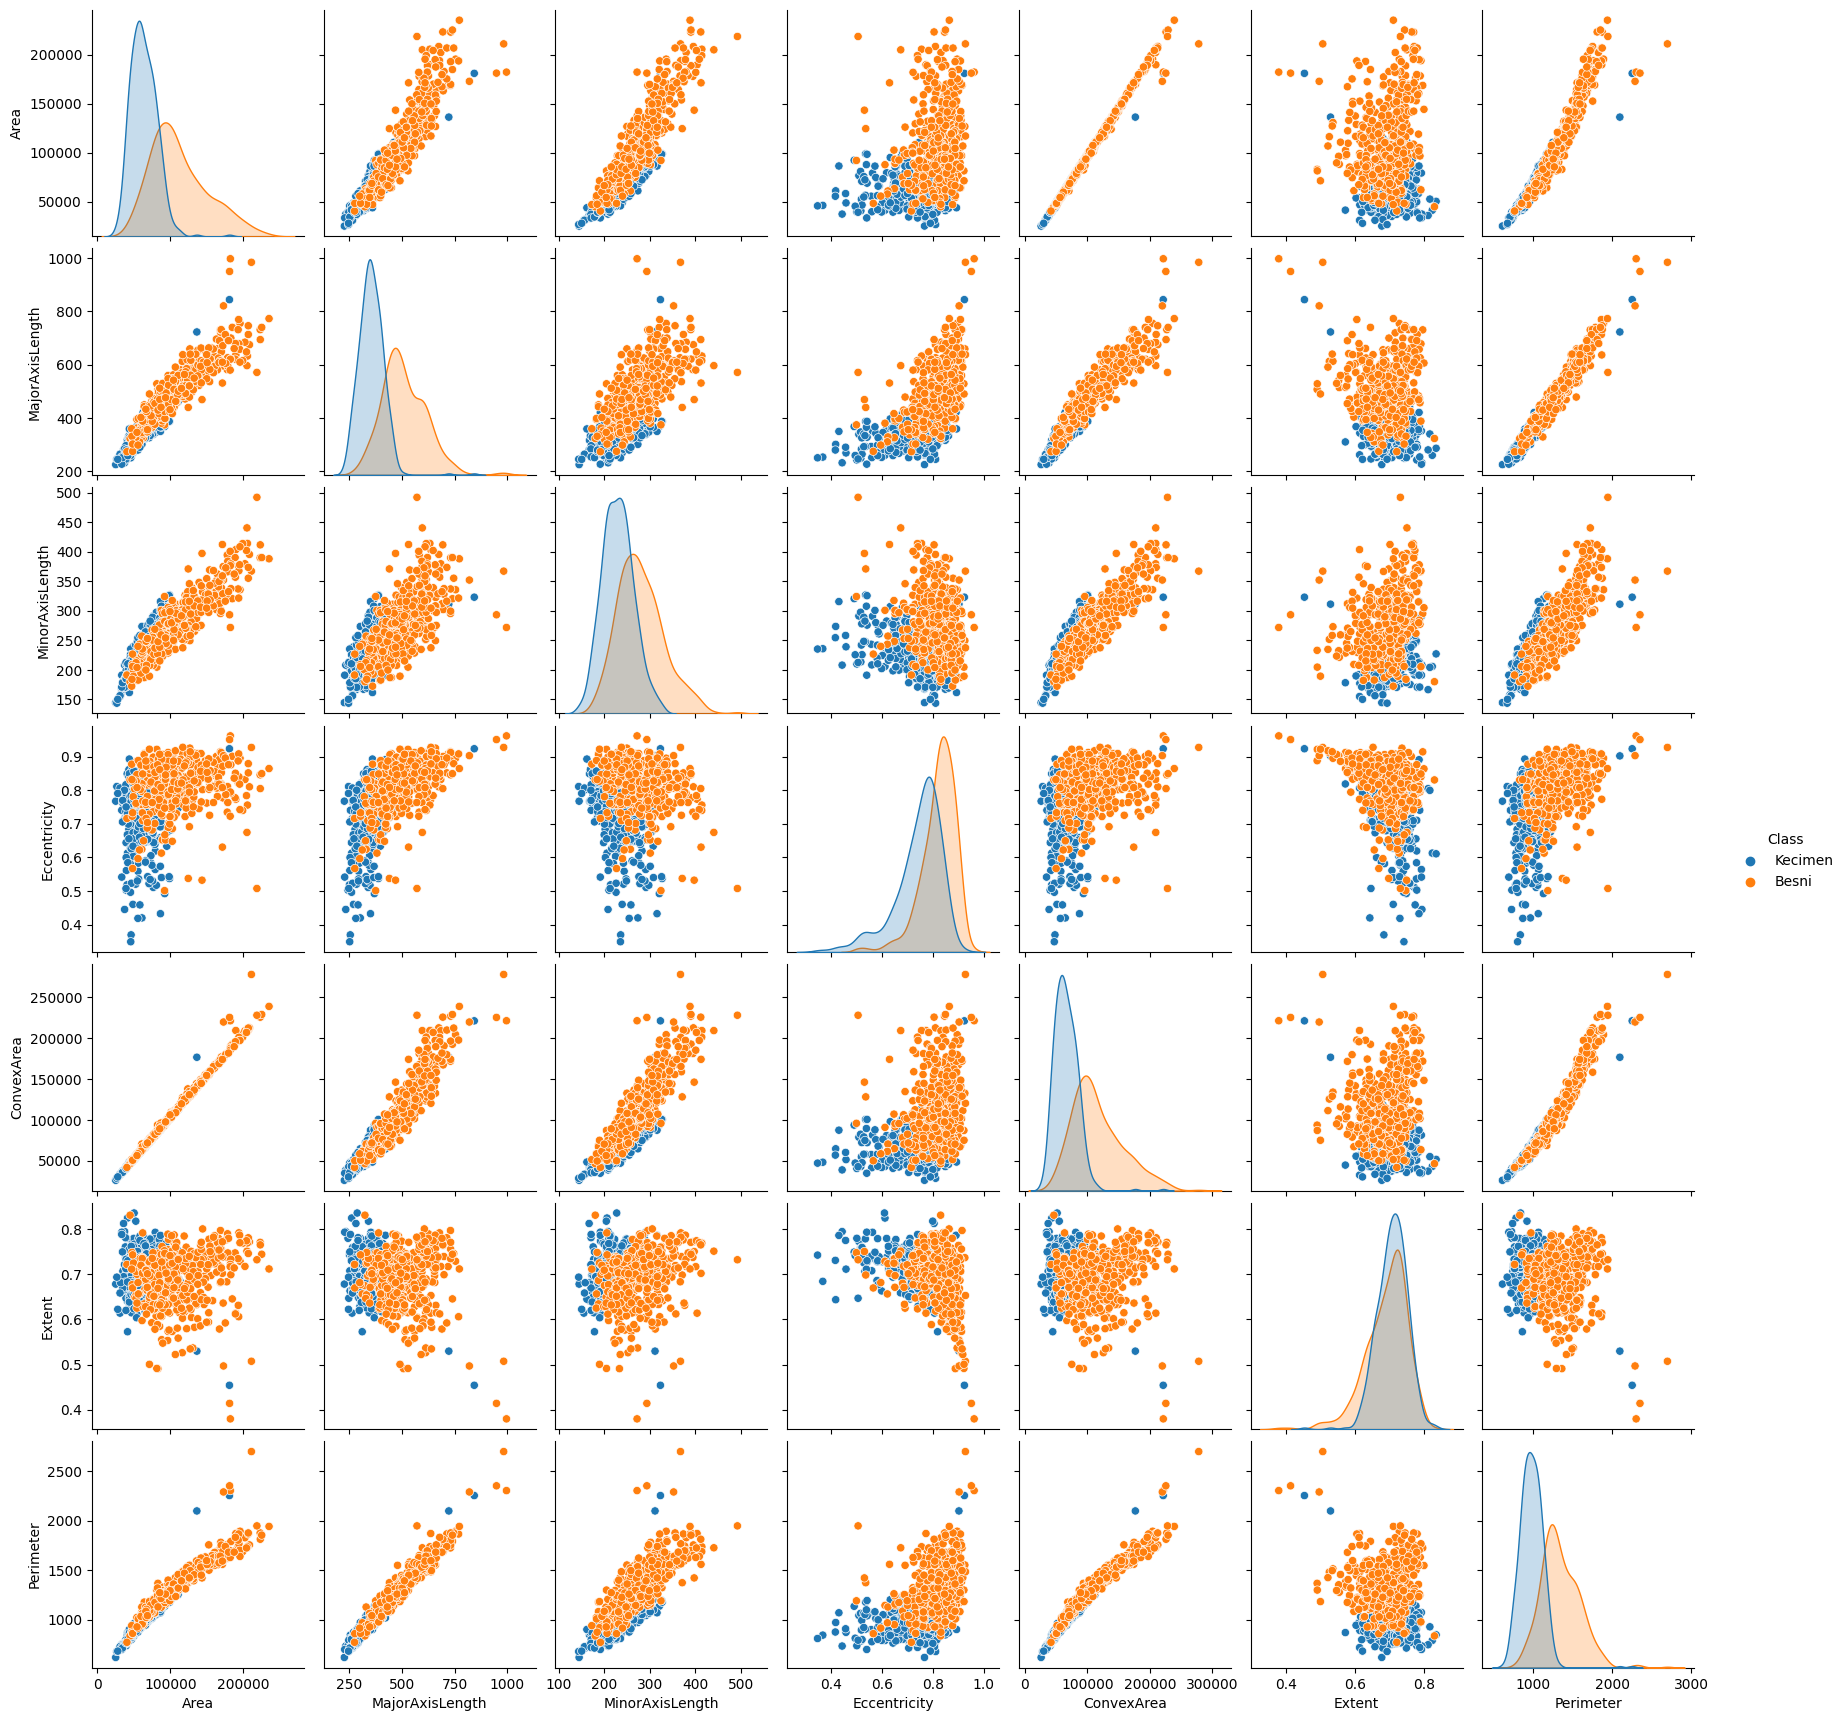

In [15]:
sns.pairplot(df, hue = "Class");

In [16]:
from pandas_profiling import ProfileReport

In [17]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Train | Test Split and Scaling
## Logistic Regression
## Model Performance

In [21]:
X= df.drop(columns="Class")
y= df.Class

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression()

In [32]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
y_pred = log_model.predict(X_test_scaled)

In [34]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [35]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]#1 olma olasılığı
test_data.sample(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
54   111450          478.311          298.631         0.781      113256   
664  104669          546.673          248.528         0.891      110984   
575  146175          592.909          319.020         0.843      149156   
590  177916          581.710          394.525         0.735      181352   
110   81572          393.716          265.815         0.738       84964   
734  100186          462.506          277.699         0.800      101921   
778  148073          599.363          327.084         0.838      152985   
275   33662          227.294          191.109         0.541       34787   
367   56518          319.192          230.710         0.691       58879   
120   69302          354.964          254.453         0.697       71843   

     Extent  Perimeter    Class     pred  pred_proba  
54    0.690   1298.188  Kecimen    Besni       0.141  
664   0.687   1398.545    Besni    Besni       0.030  
575   0.633   1529.068    Besni    Besni       0.007  
590   0.737   1647.505    Besni    Besni       0.006  
110   0.698   1187.338  Kecimen    Besni       0.485  
734   0.682   1217.831    Besni    Besni       0.233  
778   0.690   1557.606    Besni    Besni       0.007  
275   0.793    699.415  Kecimen  Kecimen       0.996  
367   0.719    916.396  Kecimen  Kecimen       0.936  
120   0.701   1051.020  Kecimen  Kecimen       0.802

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [38]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 11]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[308  56]
 [ 39 317]]
              precision    recall  f1-score   support

       Besni       0.89      0.85      0.87       364
     Kecimen       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [39]:
from sklearn.model_selection import cross_validate

In [42]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_weighted  \
1      0.015       0.012          0.847                    0.850   
2      0.015       0.011          0.875                    0.882   
3      0.026       0.016          0.819                    0.820   
4      0.021       0.015          0.944                    0.946   
5      0.028       0.008          0.861                    0.866   
6      0.016       0.007          0.889                    0.890   
7      0.009       0.008          0.778                    0.782   
8      0.008       0.009          0.833                    0.838   
9      0.016       0.016          0.931                    0.931   
10     0.017       0.011          0.903                    0.911   

    test_recall_weighted  test_f1_weighted  
1                  0.847             0.847  
2                  0.875             0.874  
3                  0.819             0.819  
4                  0.944             0.944  
5                  0.861             0.861  
6                  0.889             0.889  
7                  0.778             0.777  
8                  0.833             0.833  
9                  0.931             0.931  
10                 0.903             0.902

In [43]:
df_scores.mean()[2:] # datanın cv sonucu gerçek değerleri. test ve trainle karşılaştırıldığında uyumlu olduğu görülüyor.

test_accuracy             0.868
test_precision_weighted   0.872
test_recall_weighted      0.868
test_f1_weighted          0.868
dtype: float64

### GridSearchCV

In [44]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [45]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV ile recall iyileştirmek için parametreleri ve değerleri ayarlayıp  1 skorunun değerini iyileştirip hastalaı yakalama oranını artırmak. 

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik 

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", # 1 class ait en iyi skoru döndürecek, tek score verebiliriz
                          n_jobs = -1)

In [47]:
log_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
params = {'C': [0.01, 0.1, 1, 10, 100]}
grid_model = GridSearchCV(log_reg, param_grid=params, cv=10, n_jobs=-1)
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [48]:
grid_model.best_params_

{'C': 1}

In [49]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[76 10]
 [15 79]]
              precision    recall  f1-score   support

       Besni       0.84      0.88      0.86        86
     Kecimen       0.89      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[311  53]
 [ 41 315]]
              precision    recall  f1-score   support

       Besni       0.88      0.85      0.87       364
     Kecimen       0.86      0.88      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [50]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

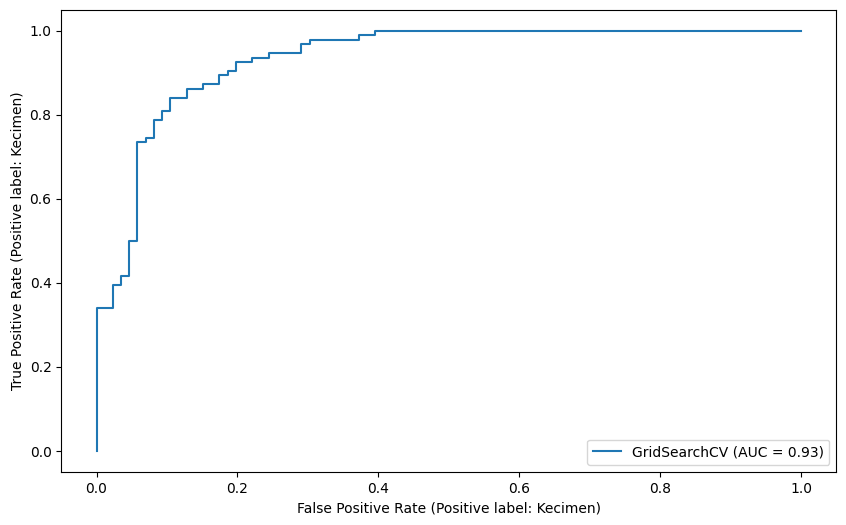

In [51]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show() # balans datalarda

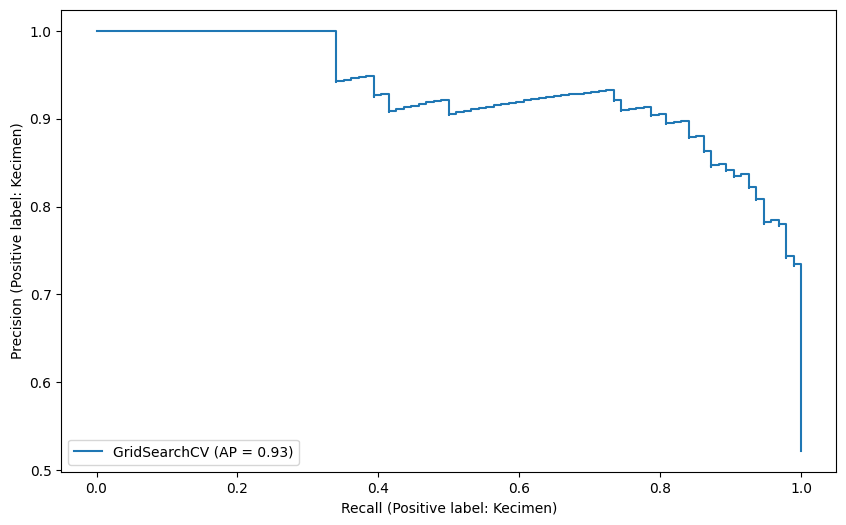

In [52]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);
plt.show() #unbalance datalarda 

# Conclusion 